# Introduccion a TensorFlow
Los algoritmos basados en Redes Neuronales se inspiran principalmente en el funcionamiento de las Neuronas reales. TensorFlow es el segundo framework creado por google.

Gracias a los tensores nos va a permitir muchos calculos computacional, con grafos y mapas.

En cada `grafo` representa una funcion de activacion. Cada `flujo` contiene su pese.

## Deep Learning y Aprendizaje no supervisado

**`Redes Neuronales`**: Es simplemente Un conjunto de entradas con su correspondiente peso donde se le aplica una sumatoria de todos los imputs y luego se le aplica una funcion de activacion. La forma matematica con la cual se le atribuye una neurona se denomina `perceptron`.

**En el deep learning** normalmente se inicia todos los pesos con un valor aleatorio y luego se retroalimenta con la salida que se genero. Esta `propagacion del error` es el concepto fundamental dentro de esta rama. La clasificacion es Binaria (0,1)

**Las funciones de activaciones puede ser**:
* Sigmoidea
* Rectificador
* Tangente hiperbolica

Esto se realiza a travez del despeje de W de la funcion Perceptron.

El error tambien tiene una formula matematica.

**Tiene limitaciones este modelo**, si los datos no pueden ser linealmente separables por un hiperplano provocara que nunca sea posible que el algoritmo converja.

### Introduccion de TensorFlow v1
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
**El curso fue desarrollado en Tensorflow v1, por ello va a ser actualizado a v2 por mi**

In [30]:
import tensorflow as tf

In [2]:
#un tensor es basicamente un arreglo.
#Esto es TF V1- NO EJECUTAR

#De esta forma creamos una constante en tensorflow
cons1 = tf.constant([1,2,3,4,5])
cons2 = tf.constant([6,7,8,9,10])
res = tf.multiply(cons1,cons2)
print(res)

Tensor("Mul:0", shape=(5,), dtype=int32)


* Como podemos ver nos devuelve un objeto y no el resultado en si
* Esto tiene sentido porque tensorflow trabaja con placeholders, son tipo de datos que durante la seccion se guardan.
* Esto quiere decir que estamos trabajando con modelos. Nunca nos va a devolver los resultados

Para ver los valores se tiene que crear un `session`

In [3]:
sess = tf.Session()
print(sess.run(res))
sess.close()

[ 6 14 24 36 50]


In [4]:
with tf.Session() as sess:
    print(sess.run(res))

[ 6 14 24 36 50]


In [5]:
config = tf.ConfigProto(log_device_placement=True ,allow_soft_placement=True)

## Aprendizaje Neuoronal Dataset Senial de Autos
### Analisis Ecploratorio

In [6]:
import os
import pandas as pd
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.rcParams['figure.figsize'] = (16,8)

In [7]:
def load_data(data_direct):
    dirs = [d for d in os.listdir(data_direct) if os.path.isdir(os.path.join(data_direct,d))]
    
    labels = []
    images = []
    
    for d in dirs:
        label_dir = os.path.join(data_direct,d)
        file_names = [ os.path.join(label_dir , f) for f in os.listdir(label_dir) if f.endswith('.ppm')] 
        
        for f in file_names:
            images.append(io.imread(f))
            labels.append(int(d))
            
    return images, labels

In [8]:
main_dir = '../python-ml-course-master/datasets/belgian/'
train_data_dir = os.path.join(main_dir , 'Training')
test_data_dir = os.path.join(main_dir , 'Testing')

In [9]:
images , labels = load_data(train_data_dir)

In [10]:
print('Cantidad de Imagenes :', len(images))
print('Cantidad de labels: ', len(labels))

Cantidad de Imagenes : 4575
Cantidad de labels:  4575


In [11]:
images = np.array(images)
labels = np.array(labels)

In [12]:
#Esto es UNA sola image, cada uno representa un color (azul rojo y verde)
images[0]

array([[[251, 251, 247],
        [252, 250, 242],
        [253, 249, 237],
        ...,
        [104,  91,  57],
        [140,  98,  75],
        [176, 105,  93]],

       [[247, 255, 241],
        [253, 255, 246],
        [248, 255, 239],
        ...,
        [142, 117,  84],
        [146,  94,  68],
        [185, 111,  91]],

       [[191, 209, 179],
        [220, 238, 209],
        [239, 255, 230],
        ...,
        [141, 102,  73],
        [157,  98,  70],
        [236, 165, 135]],

       ...,

       [[ 83,  79,  26],
        [113, 102,  43],
        [142, 125,  62],
        ...,
        [ 79,  68,  42],
        [ 79,  67,  42],
        [ 80,  67,  43]],

       [[105,  98,  40],
        [128, 116,  55],
        [149, 134,  70],
        ...,
        [ 76,  67,  44],
        [ 67,  57,  35],
        [ 59,  47,  27]],

       [[128, 119,  57],
        [141, 129,  65],
        [152, 139,  73],
        ...,
        [ 73,  66,  45],
        [ 58,  49,  29],
        [ 43,  32,  13]]

In [13]:
len(set(labels))
#Esto nos devulve la cantidad de labels diferentes

62

In [14]:
images.flags
#Esto es una serie de datos que nos dice como fue la carga en memoria

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [15]:
images.itemsize
#cantidad de bytes que requiere cada item/

8

In [16]:
images.nbytes
#cuanto pesa el objeto

36600

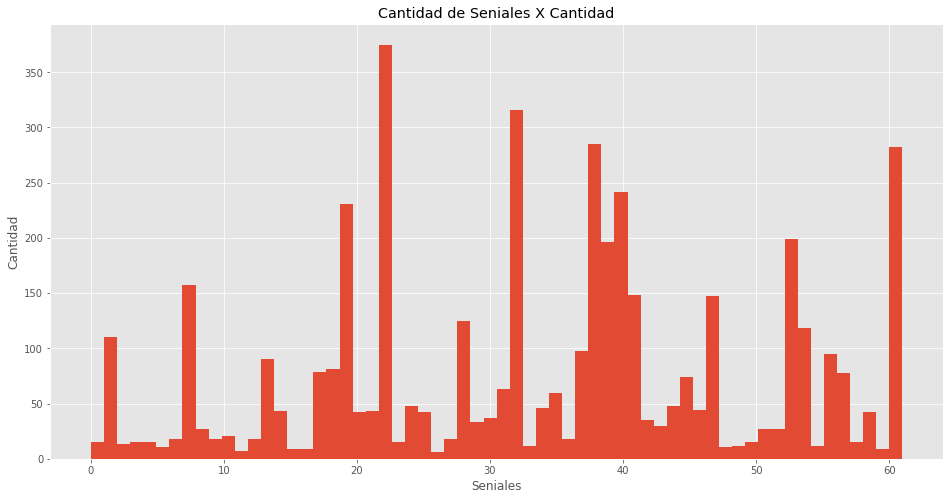

In [17]:
plt.hist(labels , bins=len(set(labels)), density=False , )
plt.xlabel('Seniales')
plt.ylabel('Cantidad')
plt.title('Cantidad de Seniales X Cantidad')
plt.show()

In [18]:
import random
rand_sign = random.sample(range(0, len(labels)),6)
rand_sign

[536, 3693, 1789, 2389, 870, 2836]

In [19]:
def plot_(images_ , _cmap=None):
    for i in range(len(rand_sign)):
        temp_img = images_[rand_sign[i]]
        plt.subplot(1,6,i+1)
        plt.axis('off')
        plt.imshow(temp_img ,cmap=_cmap)
        plt.subplots_adjust(wspace=0.5)
        plt.show()
        print('Forma: {0} , min: {1} , max: {2}'.format(temp_img.shape , temp_img.min() , temp_img.max()))

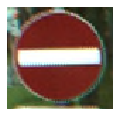

Forma: (73, 75, 3) , min: 6 , max: 255


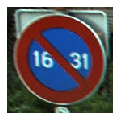

Forma: (132, 131, 3) , min: 0 , max: 255


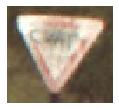

Forma: (56, 61, 3) , min: 34 , max: 255


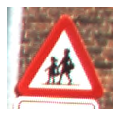

Forma: (106, 109, 3) , min: 19 , max: 255


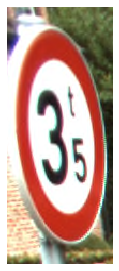

Forma: (242, 99, 3) , min: 5 , max: 255


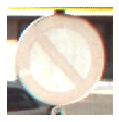

Forma: (100, 97, 3) , min: 0 , max: 255


In [20]:
plot_(images_=images)

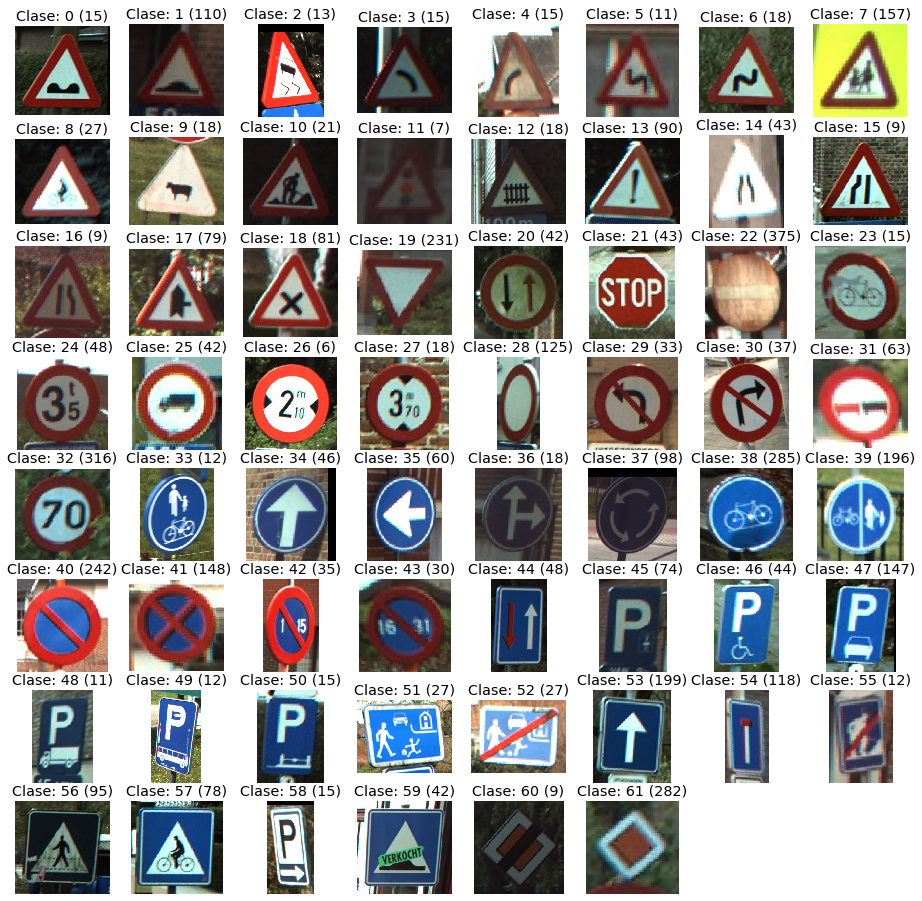

In [21]:
unique_label = set(labels)
plt.figure(figsize=(16,16))
i = 1
for label in unique_label:
    temp_im = images[list(labels).index(label)]
    plt.subplot(8,8,i)
    plt.axis('off')
    plt.title('Clase: {0} ({1})'.format(label, list(labels).count(label)))
    i+=1
    plt.imshow(temp_im)

* Como pudimos ver con anterioridad hay mas imagenes de una que con otra. Por lo que podemos descubrir una frecuencia.
* Pero esto puede depender simplemente del dataset, por lo que no se podria estar seguro en generar este tipo de relacion

## Modelo de TensorFlow
* Las imagenes no son todas del mismo tamanio
* hay 62 tipos de imagenes
* La distribucion de seniales de traficos no son uniformes, algunas salen mas veces que otras


**Algo para tener en cuenta:**
* Deberiamos de pasar el modelo a blanco y negro ya que una foto mal sacada podria podria provocar que se malinterprete.
* Lo que buscamos a analizar por ello es la forma y no los colores
* Tambien todas deberian de ser del mismo tamanio

#### Preprocesado:

In [22]:
from skimage import transform

In [23]:
altura = 9999
anchura = 9999
for image in images:
    if(image.shape[0] < altura):
        altura = image.shape[0]
    if(image.shape[1] < anchura):
        anchura = image.shape[1]
print('Altura min: ',altura)
print('Anchura min: ',anchura)

Altura min:  22
Anchura min:  20


In [24]:
images30 = [transform.resize(image , (30,30)) for image in images]
images30

[array([[[0.87851961, 0.87235294, 0.77431373],
         [0.87202941, 0.87862745, 0.79261765],
         [0.88897059, 0.88313725, 0.79509804],
         ...,
         [0.78397059, 0.60176471, 0.45509804],
         [0.61046078, 0.45281373, 0.3372549 ],
         [0.53529412, 0.45951961, 0.34912745]],
 
        [[0.94137255, 0.91973529, 0.88764706],
         [0.9472549 , 0.93333333, 0.89843137],
         [0.91142157, 0.90058824, 0.80980392],
         ...,
         [0.89372549, 0.73117647, 0.58607843],
         [0.72842157, 0.60861765, 0.48097059],
         [0.4439902 , 0.36183333, 0.25104902]],
 
        [[0.98431373, 0.98039216, 0.97647059],
         [0.96333333, 0.96745098, 0.95568627],
         [0.83602941, 0.92622549, 0.91838235],
         ...,
         [0.86372549, 0.70980392, 0.57156863],
         [0.74965686, 0.60848039, 0.45495098],
         [0.67117647, 0.55691176, 0.36294118]],
 
        ...,
 
        [[0.46431373, 0.41740196, 0.24313725],
         [0.45901961, 0.38862745, 0.23647

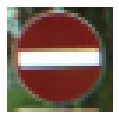

Forma: (30, 30, 3) , min: 0.04181372549019648 , max: 0.996078431372549


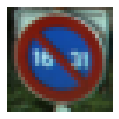

Forma: (30, 30, 3) , min: 0.022352941176470485 , max: 0.9076666666666668


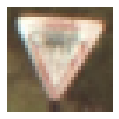

Forma: (30, 30, 3) , min: 0.1637538126361656 , max: 0.995169934640523


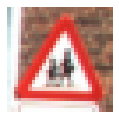

Forma: (30, 30, 3) , min: 0.12490196078431363 , max: 0.996078431372549


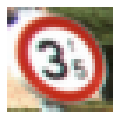

Forma: (30, 30, 3) , min: 0.05431372549019611 , max: 0.996078431372549


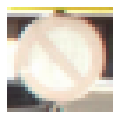

Forma: (30, 30, 3) , min: 0.15153594771241805 , max: 0.9921568627450981


In [25]:
plot_(images_=images30)

* Normalmente los datos se tienen que normalizar

In [26]:
from skimage.color import rgb2gray

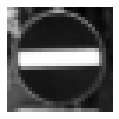

Forma: (30, 30) , min: 0.10651459803921628 , max: 0.9957049836601307


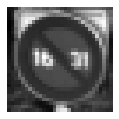

Forma: (30, 30) , min: 0.047499998692810366 , max: 0.8088357450980396


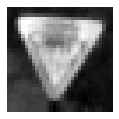

Forma: (30, 30) , min: 0.20895812418300644 , max: 0.9910960496732028


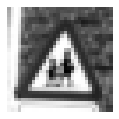

Forma: (30, 30) , min: 0.18339146143790797 , max: 0.9957956862745099


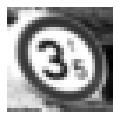

Forma: (30, 30) , min: 0.09377407843137248 , max: 0.996078431372549


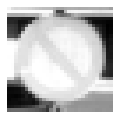

Forma: (30, 30) , min: 0.16334079411764674 , max: 0.9920154901960785


In [27]:
images30 = np.array(images30)
images30 = rgb2gray(images30)
plot_(images_=images30, _cmap='gray')

## Modelado
Por cuestiones de que no se puede seguir el curso, decidi realizarlo por keras ya que es mucho mas simple que aprender tensorflow v2.0

In [31]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(30,30))) #capa de aplanado que recibe 900 pixeles 30*30 c/u de las imagenes
model.add(tf.keras.layers.Dense(units=130, activation="relu")) #activador relu, 130 neuronas
model.add(tf.keras.layers.Dense(units=256, activation="sigmoid"))#nueva capa para mejorar efectividad
model.add(tf.keras.layers.Dropout(0.2)) #capa DropOut, 20% NO aprende. Esto para mejorar su eficacia con datos diferentes a los de test
model.add(tf.keras.layers.Dense(units=62, activation='softmax'))
#capa de salida, 62 diferentes categorias

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



## Compilar
* Optimizer: Adam uno de los mejores optimizadores de gradiente descendiente estocastico es el recomendado por defecto
* Loss: Sparse softmax (categorical) crossentropy. Es decir como va a calcular el error entre la prediccion y la categoria real
* metrics = "sparse_categorical_accuracy", me permite conocer los porcentajes de acierto o eficacia. Como su nombre lo indica me permite medir esto teniendo en cuenta las categorias

In [32]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [33]:
model.summary() #resumen de los datos de mi modelo


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 900)               0         
_________________________________________________________________
dense (Dense)                (None, 130)               117130    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33536     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 62)                15934     
Total params: 166,600
Trainable params: 166,600
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(images30, labels, epochs=10)

Train on 4575 samples
Epoch 1/10
4575/4575 [==============================] - 0s 85us/sample - loss: 3.2214 - sparse_categorical_accuracy: 0.2345
Epoch 2/10
4575/4575 [==============================] - 0s 64us/sample - loss: 2.1218 - sparse_categorical_accuracy: 0.4756
Epoch 3/10
4575/4575 [==============================] - 0s 65us/sample - loss: 1.5742 - sparse_categorical_accuracy: 0.5926
Epoch 4/10
4575/4575 [==============================] - 0s 62us/sample - loss: 1.2449 - sparse_categorical_accuracy: 0.6748
Epoch 5/10
4575/4575 [==============================] - 0s 79us/sample - loss: 1.0330 - sparse_categorical_accuracy: 0.7292
Epoch 6/10
4575/4575 [==============================] - 0s 62us/sample - loss: 0.8913 - sparse_categorical_accuracy: 0.7578
Epoch 7/10
4575/4575 [==============================] - 0s 62us/sample - loss: 0.7748 - sparse_categorical_accuracy: 0.7893
Epoch 8/10
4575/4575 [==============================] - 0s 64us/sample - loss: 0.6717 - sparse_categorical_acc

### Evaluamos el conjunto

In [36]:
#dataset test
images_test , labels_test = load_data(test_data_dir)
images_test = np.array(images_test)
labels_test = np.array(labels_test)
images30_test = [transform.resize(image , (30,30)) for image in images_test]
images30_test = np.array(images30_test)
images30_test = rgb2gray(images30_test)

In [37]:
test_loss, test_accuracy = model.evaluate(images30_test, labels_test)

2520/2520 [==============================] - 0s 48us/sample - loss: 0.5607 - sparse_categorical_accuracy: 0.8643


In [38]:
predicciones = model.predict(images30_test)#el modelo ha predecido la clase para cada imagen del set de testing

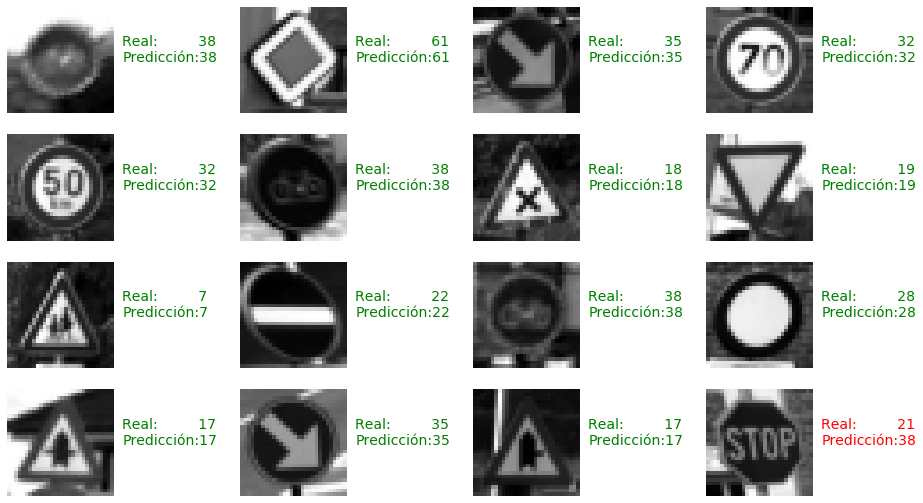

In [43]:
ejemplo_idx = random.sample(range(len(images30_test)), 16)# numero aleatorios en rango de imagenes
plt.figure(figsize=(16,9))#tamaño de imagen a mostrar
m=1#para controlar lugar sobre el cual dibujar
for i in ejemplo_idx:#en el rango de mis 10 valores generados
    verdadero = labels_test[i]#la etiqueta real de la imagen predicha (del dataset de etiquetas para testing)
    predicho = np.argmax(predicciones[i])#valor de etiqueta predecido por la RNA
    #print(verdadero, ":", predecido)
    plt.subplot(4,4,m)
    m+=1
    plt.axis("off")
    color = "green" if verdadero == predicho else "red"
    plt.text(32,15, "Real:         {0}\nPredicción:{1}".format(verdadero,predicho), fontsize=14, color = color)
    plt.imshow(images30_test[i], cmap="gray")
plt.show()